In [2]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T1_simple_model import *
from scipy import stats

In [3]:
def process_T1_results(stof, verhouding, trim_tail=0, v=False):
    My_delay_pairs = []
    for (delay, df) in get_df_of_all_delays(
            stof,
            verhouding,
            T=T1,
            signal_index=SI_SIGNAL):

        My = My_for_T1_df(df, v)

        # we willen de absolute waarde van alles
        # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
        My = max(0, My)

        My_delay_pairs.append((My, delay))

    M0 = My_delay_pairs[len(My_delay_pairs) - 1][0]

    # eerste drie elementen weghalen omdat die niet goed in ons onderzoek passen
    # Bij de eerste 4 elementen hebben we zo dicht gemeten op pi dat het geen aangroei tijd had
    # De meetpunten in dat gebied zijn weggehaald
    My_delay_pairs = My_delay_pairs[trim_tail:]

    uncertainties = np.array([0.0 for _ in range(len(My_delay_pairs))])
    uncertainties += voltage_uncertainty_due_to_noise(v)
    weights = 1 / uncertainties

    fit_T1 = model_T1.fit([My for (My, delay) in My_delay_pairs], t=[delay for (My, delay) in My_delay_pairs], M0=M0, T1=1000, weights=weights)

    pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree)

    if v:
        fit_T1.plot()
        print(f"De p waarde is {pvalue:.9f}.")
        print(fit_T1.fit_report())

    return fit_T1, pvalue

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lmfit/model.py:1893: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(**ax_kws)


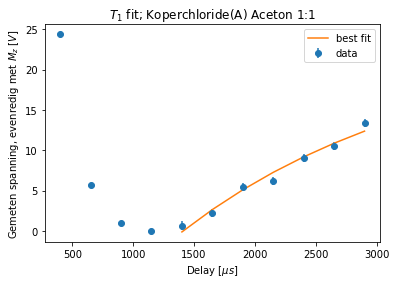

In [5]:
My_delay_pairs = []
for (delay, df) in get_df_of_all_delays(
        STOF_KOPERCHLORIDE_ACETOON,
        "1_1",
        T=T1,
        signal_index=SI_SIGNAL):

    My = My_for_T1_df(df)
    My = max(0, My)

    My_delay_pairs.append((My, delay))

My_delay_pairs = My_delay_pairs[:4]
ax = plt.scatter([delay for (_, delay) in My_delay_pairs], [My for (My, _) in My_delay_pairs])

fit_T1, pvalue = process_T1_results(STOF_KOPERCHLORIDE_ACETOON, "1_1", trim_tail=4)
fit_T1.plot_fit(ax=ax, title=r"$T_1$ fit; Koperchloride(A) Aceton 1:1", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_z$ [$V$]")
plt.savefig("../plots/T1_koperchlorideA_Aceton_1_1.png")
fit_T1

In [ ]:
fit_T1, pvalue = process_T1_results(STOF_KOPERCHLORIDE_A, "1_0")
fit_T1.plot(title=r"$T_1$ fit; Koperchloride(A) (ongemengd)", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_z$ [$V$]")
plt.savefig("../plots/T1_koperchlorideA.png")
fit_T1

In [ ]:
fit_T1, pvalue= process_T1_results(STOF_KOPERCHLORIDE_B, "1_0")
fit_T1.plot(title=r"$T_1$ fit; Koperchloride(B) (ongemengd)", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_z$ [$V$]")
plt.savefig("../plots/T1_koperchlorideB.png")
fit_T1

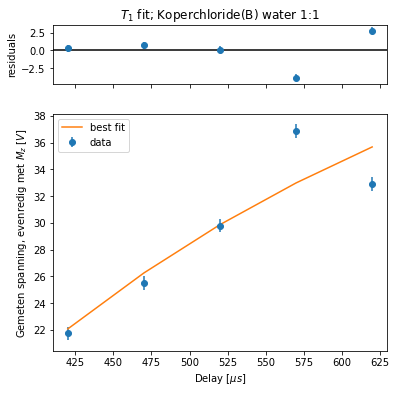

In [6]:
fit_T1, pvalue= process_T1_results(STOF_KOPERCHLORIDE_B, "1_1")
fit_T1.plot(title=r"$T_1$ fit; Koperchloride(B) water 1:1", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_z$ [$V$]")
plt.savefig("../plots/T1_koperchlorideB_water_1_1.png")
fit_T1

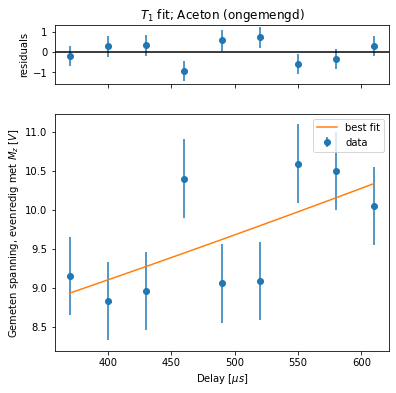

In [7]:
fit_T1, pvalue= process_T1_results(STOF_ACETOON, "1_0")
fit_T1.plot(title=r"$T_1$ fit; Aceton (ongemengd)", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_z$ [$V$]")
plt.savefig("../plots/T1_aceton.png")
fit_T1